In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt


In [ ]:
table = pd.read_csv("/content/Precinct - Combined.csv")
table.head()

,Unnamed: 0,Area Name,id,Total,Hispanic,White,Black,Asian,Mixed,Others,Population Density: Hispanic,Population Density: White,Population Density: Black,Population Density: Asian,Population Density: Mixed,Population Density: Others,Polling Sites
0,1,"2, Appling County, Georgia",7000000US13001000002,3563,403,1215,1838,10,81,16,0.113107,0.341005,0.515857,0.002807,0.022734,0.004491,1
1,2,"1B, Appling County, Georgia",7000000US1300100001B,1834,76,1575,109,3,63,8,0.041439,0.858779,0.059433,0.001636,0.034351,0.004362,1
2,3,"1C, Appling County, Georgia",7000000US1300100001C,1538,116,1242,150,5,25,0,0.075423,0.807542,0.097529,0.003251,0.016255,0.000000,1
3,4,"3C, Appling County, Georgia",7000000US1300100003C,2515,263,1528,608,39,69,8,0.104573,0.607555,0.241749,0.015507,0.027435,0.003181,1
4,5,"4B, Appling County, Georgia",7000000US1300100004B,1321,62,1147,59,5,43,5,0.046934,0.868282,0.044663,0.003785,0.032551,0.003785,1


In [ ]:
table = pd.get_dummies(table,drop_first=True)
table.sample(5)

,Unnamed: 0,Total,Hispanic,White,Black,Asian,Mixed,Others,Population Density: Hispanic,Population Density: White,Population Density: Black,Population Density: Asian,Population Density: Mixed,Population Density: Others,Polling Sites,"Area Name_#10 REDBONE, Lee County, Georgia","Area Name_#2 SMITHVILLE, Lee County, Georgia","Area Name_#3 CJC, Lee County, Georgia","Area Name_#4 LEESBURG, Lee County, Georgia","Area Name_#5 FRIENDSHIP BAPT., Lee County, Georgia","Area Name_#6 FIRST BAPTIST, Lee County, Georgia","Area Name_#7 SDA CHURCH, Lee County, Georgia","Area Name_#8 SOVEREIGN GRACE, Lee County, Georgia","Area Name_#9 CENTURY FIRE STAT, Lee County, Georgia","Area Name_01, Barrow County, Georgia","Area Name_0110001 - ANDERSON Voting District, Banks County, Georgia","Area Name_0110002 - BALDWIN Voting District, Banks County, Georgia","Area Name_0110003 - BERLIN Voting District, Banks County, Georgia","Area Name_0110004 - BUSHVILLE Voting District, Banks County, Georgia","Area Name_0110005 - COLUMBIA Voting District, Banks County, Georgia","Area Name_0110006 - DAVIDS Voting District, Banks County, Georgia","Area Name_0110007 - GOLDEN HILL Voting District, Banks County, Georgia","Area Name_0110008 - GROVE RIVER Voting District, Banks County, Georgia","Area Name_0110009 - HOLLINGSWORTH Voting District, Banks County, Georgia","Area Name_0110010 - HOMER Voting District, Banks County, Georgia","Area Name_0110011 - POPLAR SPRINGS Voting District, Banks County, Georgia","Area Name_0110012 - WASHINGTON Voting District, Banks County, Georgia","Area Name_0110013 - WILMONTS Voting District, Banks County, Georgia","Area Name_0191144 - RAY CITY Voting District, Berrien County, Georgia","Area Name_0191148 - UPPER TENTH Voting District, Berrien County, Georgia",...,id_7000000US133130000UT,id_7000000US133130000VA,id_7000000US133130000WS,id_7000000US1331500001A,id_7000000US1331500002A,id_7000000US1331500002B,id_7000000US1331500003A,id_7000000US1331500004A,id_7000000US1331500005A,id_7000000US13317000001,id_7000000US1331700002A,id_7000000US1331700002B,id_7000000US1331700003A,id_7000000US1331700003B,id_7000000US1331700004A,id_7000000US1331700004B,id_7000000US13319000002,id_7000000US13319000003,id_7000000US13319000004,id_7000000US13319000005,id_7000000US13319000006,id_7000000US13319000007,id_7000000US13319000008,id_7000000US13319000010,id_7000000US13319000011,id_7000000US13321000001,id_7000000US13321000002,id_7000000US13321000003,id_7000000US13321000004,id_7000000US13321000005,id_7000000US13321000006,id_7000000US13321000007,id_7000000US13321000008,id_7000000US13321000009,id_7000000US13321000010,id_7000000US13321000011,id_7000000US13321000012,id_7000000US13321000014,id_7000000US13321000015,id_7000000US13321000016
2569,2583,1541,26,1389,62,13,46,5,0.016872,0.901363,0.040234,0.008436,0.029851,0.003245,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2522,2536,557,8,346,189,2,11,1,0.014363,0.621185,0.339318,0.003591,0.019749,0.001795,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1335,1340,6553,2066,1574,2339,262,228,84,0.315275,0.240195,0.356936,0.039982,0.034793,0.012819,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1414,1423,188,6,0,173,0,6,3,0.031915,0.000000,0.920213,0.000000,0.031915,0.015957,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2318,2332,2270,126,151,1883,22,72,16,0.055507,0.066520,0.829515,0.009692,0.031718,0.007048,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(table.drop('Polling Sites', axis=1), table['Polling Sites'])

In [ ]:
LogReg = LogisticRegression()
LogReg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
table = pd.read_csv("/content/Precinct - Combined.csv")
table.head()

,Unnamed: 0,Area Name,id,Total,Hispanic,White,Black,Asian,Mixed,Others,Population Density: Hispanic,Population Density: White,Population Density: Black,Population Density: Asian,Population Density: Mixed,Population Density: Others,Polling Sites
0,1,"2, Appling County, Georgia",7000000US13001000002,3563,403,1215,1838,10,81,16,0.113107,0.341005,0.515857,0.002807,0.022734,0.004491,1
1,2,"1B, Appling County, Georgia",7000000US1300100001B,1834,76,1575,109,3,63,8,0.041439,0.858779,0.059433,0.001636,0.034351,0.004362,1
2,3,"1C, Appling County, Georgia",7000000US1300100001C,1538,116,1242,150,5,25,0,0.075423,0.807542,0.097529,0.003251,0.016255,0.000000,1
3,4,"3C, Appling County, Georgia",7000000US1300100003C,2515,263,1528,608,39,69,8,0.104573,0.607555,0.241749,0.015507,0.027435,0.003181,1
4,5,"4B, Appling County, Georgia",7000000US1300100004B,1321,62,1147,59,5,43,5,0.046934,0.868282,0.044663,0.003785,0.032551,0.003785,1


Creating the logit(odd) curve. Using Black population density as an example.

0       0.515857
1       0.059433
2       0.097529
3       0.241749
4       0.044663
          ...   
2680    0.046512
2681    0.088790
2682    0.075020
2683    0.068306
2684    0.347826
Name: Population Density: Black, Length: 2685, dtype: float64


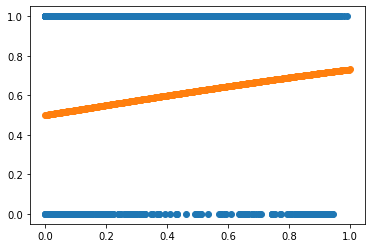

In [ ]:
def model (x):
  return 1/(1+np.exp(-x))
x1 = np.linspace(0,1,num=400)
y1 = model(x1)

 
x = table.iloc[:,12]
y = table.iloc[:,16]
print(x)
model = LogisticRegression(solver='liblinear', random_state=0)
plt.scatter(x,y)
plt.scatter(x1,y1)
plt.show()

Building regression model and getting coefficients.

In [ ]:

import statsmodels.api as sm
table.head()


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Unnamed: 0,Area Name,id,Total,Hispanic,White,Black,Asian,Mixed,Others,Population Density: Hispanic,Population Density: White,Population Density: Black,Population Density: Asian,Population Density: Mixed,Population Density: Others,Polling Sites
0,1,"2, Appling County, Georgia",7000000US13001000002,3563,403,1215,1838,10,81,16,0.113107,0.341005,0.515857,0.002807,0.022734,0.004491,1
1,2,"1B, Appling County, Georgia",7000000US1300100001B,1834,76,1575,109,3,63,8,0.041439,0.858779,0.059433,0.001636,0.034351,0.004362,1
2,3,"1C, Appling County, Georgia",7000000US1300100001C,1538,116,1242,150,5,25,0,0.075423,0.807542,0.097529,0.003251,0.016255,0.000000,1
3,4,"3C, Appling County, Georgia",7000000US1300100003C,2515,263,1528,608,39,69,8,0.104573,0.607555,0.241749,0.015507,0.027435,0.003181,1
4,5,"4B, Appling County, Georgia",7000000US1300100004B,1321,62,1147,59,5,43,5,0.046934,0.868282,0.044663,0.003785,0.032551,0.003785,1


In [ ]:
model = sm.GLM.from_formula("table.iloc[:,12] ~ table.iloc[:,16]", family = sm.families.Binomial(), data=table)
result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      table.iloc[:, 12]   No. Observations:                 2685
Model:                            GLM   Df Residuals:                     2683
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1301.1
Date:                Thu, 06 Jan 2022   Deviance:                       1047.0
Time:                        17:56:54   Pearson chi2:                     974.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.3939      0.118     -3.335      0.001      -0.625      -0.162
table.iloc[:, 16]    -0.4628      0.126     -3.664      0.000      -0.710      -0.215
=====================================================================================
"""

Now we find the p-value using the z-value


In [ ]:
import scipy.stats 
scipy.stats.norm.sf(abs(-3.664))



0.00012415339193721722

Now we are going to find the coefficients for all of the racial groups. 

1. Hispanic

0       0.113107
1       0.041439
2       0.075423
3       0.104573
4       0.046934
          ...   
2680    0.013680
2681    0.007769
2682    0.015962
2683    0.025137
2684    0.054348
Name: Population Density: Hispanic, Length: 2685, dtype: float64


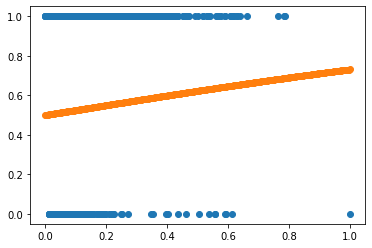

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      table.iloc[:, 10]   No. Observations:                 2685
Model:                            GLM   Df Residuals:                     2683
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -596.98
Date:                Thu, 06 Jan 2022   Deviance:                       220.48
Time:                        19:11:00   Pearson chi2:                     315.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.3599      0.206    -11.438      0.000      -2.764      -1.956
table.iloc[:, 16]    -0.0261      0.219     -0.119      0.905      -0.455       0.403
=====================================================================================
"""

In [ ]:
def model (x):
  return 1/(1+np.exp(-x))
x1 = np.linspace(0,1,num=400)
y1 = model(x1)

 
x = table.iloc[:,10]
y = table.iloc[:,16]
print(x)
model = LogisticRegression(solver='liblinear', random_state=0)
plt.scatter(x,y)
plt.scatter(x1,y1)
plt.show()

import statsmodels.api as sm

model = sm.GLM.from_formula("table.iloc[:,10] ~ table.iloc[:,16]", family = sm.families.Binomial(), data=table)
result = model.fit()
result.summary()


In [ ]:
import scipy.stats 
scipy.stats.norm.sf(abs(-0.119))



0.4526376778909538

2. White

0       0.341005
1       0.858779
2       0.807542
3       0.607555
4       0.868282
          ...   
2680    0.913817
2681    0.862375
2682    0.895451
2683    0.868306
2684    0.565217
Name: Population Density: White, Length: 2685, dtype: float64


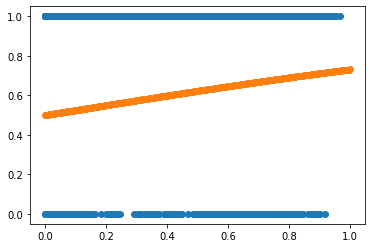

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      table.iloc[:, 11]   No. Observations:                 2685
Model:                            GLM   Df Residuals:                     2683
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1405.5
Date:                Thu, 06 Jan 2022   Deviance:                       966.43
Time:                        18:49:32   Pearson chi2:                     847.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.3458      0.118     -2.940      0.003      -0.576      -0.115
table.iloc[:, 16]     0.5146      0.125      4.132      0.000       0.271       0.759
=====================================================================================
"""

In [ ]:
def model (x):
  return 1/(1+np.exp(-x))
x1 = np.linspace(0,1,num=400)
y1 = model(x1)

 
x = table.iloc[:,11]
y = table.iloc[:,16]
print(x)
model = LogisticRegression(solver='liblinear', random_state=0)
plt.scatter(x,y)
plt.scatter(x1,y1)
plt.show()

import statsmodels.api as sm

model = sm.GLM.from_formula("table.iloc[:,11] ~ table.iloc[:,16]", family = sm.families.Binomial(), data=table)
result = model.fit()
result.summary()


In [ ]:
import scipy.stats 
scipy.stats.norm.sf(abs(4.132))



1.798102104948359e-05

3. Black

0       0.515857
1       0.059433
2       0.097529
3       0.241749
4       0.044663
          ...   
2680    0.046512
2681    0.088790
2682    0.075020
2683    0.068306
2684    0.347826
Name: Population Density: Black, Length: 2685, dtype: float64


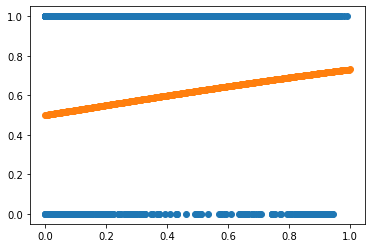

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      table.iloc[:, 12]   No. Observations:                 2685
Model:                            GLM   Df Residuals:                     2683
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1301.1
Date:                Thu, 06 Jan 2022   Deviance:                       1047.0
Time:                        18:49:57   Pearson chi2:                     974.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.3939      0.118     -3.335      0.001      -0.625      -0.162
table.iloc[:, 16]    -0.4628      0.126     -3.664      0.000      -0.710      -0.215
=====================================================================================
"""

In [ ]:
def model (x):
  return 1/(1+np.exp(-x))
x1 = np.linspace(0,1,num=400)
y1 = model(x1)

 
x = table.iloc[:,12]
y = table.iloc[:,16]
print(x)
model = LogisticRegression(solver='liblinear', random_state=0)
plt.scatter(x,y)
plt.scatter(x1,y1)
plt.show()

import statsmodels.api as sm

model = sm.GLM.from_formula("table.iloc[:,12] ~ table.iloc[:,16]", family = sm.families.Binomial(), data=table)
result = model.fit()
result.summary()


In [ ]:
import scipy.stats 
scipy.stats.norm.sf(abs(-3.664))



0.00012415339193721722

4. Asian

0       0.002807
1       0.001636
2       0.003251
3       0.015507
4       0.003785
          ...   
2680    0.002736
2681    0.004994
2682    0.001596
2683    0.006011
2684    0.000000
Name: Population Density: Asian, Length: 2685, dtype: float64


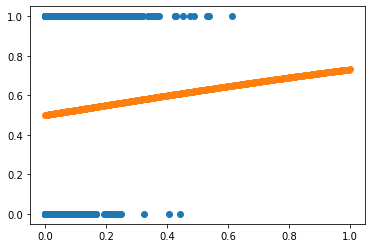

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      table.iloc[:, 13]   No. Observations:                 2685
Model:                            GLM   Df Residuals:                     2683
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -320.83
Date:                Thu, 06 Jan 2022   Deviance:                       172.86
Time:                        18:50:14   Pearson chi2:                     289.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.9912      0.271    -11.019      0.000      -3.523      -2.459
table.iloc[:, 16]    -0.4042      0.295     -1.370      0.171      -0.982       0.174
=====================================================================================
"""

In [ ]:
def model (x):
  return 1/(1+np.exp(-x))
x1 = np.linspace(0,1,num=400)
y1 = model(x1)

 
x = table.iloc[:,13]
y = table.iloc[:,16]
print(x)
model = LogisticRegression(solver='liblinear', random_state=0)
plt.scatter(x,y)
plt.scatter(x1,y1)
plt.show()

import statsmodels.api as sm

model = sm.GLM.from_formula("table.iloc[:,13] ~ table.iloc[:,16]", family = sm.families.Binomial(), data=table)
result = model.fit()
result.summary()


In [ ]:
import scipy.stats 
scipy.stats.norm.sf(abs(-1.370))



0.08534345082196698

5. Mixed

0       0.022734
1       0.034351
2       0.016255
3       0.027435
4       0.032551
          ...   
2680    0.017784
2681    0.026082
2682    0.010375
2683    0.024590
2684    0.023913
Name: Population Density: Mixed, Length: 2685, dtype: float64


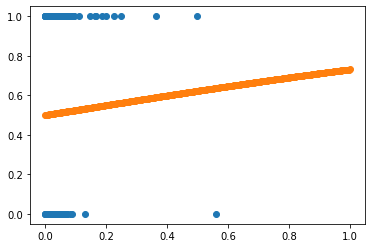

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      table.iloc[:, 14]   No. Observations:                 2685
Model:                            GLM   Df Residuals:                     2683
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -324.98
Date:                Thu, 06 Jan 2022   Deviance:                       21.729
Time:                        18:50:28   Pearson chi2:                     35.0
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -3.2138      0.301    -10.694      0.000      -3.803      -2.625
table.iloc[:, 16]    -0.0823      0.320     -0.257      0.797      -0.710       0.545
=====================================================================================
"""

In [ ]:
def model (x):
  return 1/(1+np.exp(-x))
x1 = np.linspace(0,1,num=400)
y1 = model(x1)

 
x = table.iloc[:,14]
y = table.iloc[:,16]
print(x)
model = LogisticRegression(solver='liblinear', random_state=0)
plt.scatter(x,y)
plt.scatter(x1,y1)
plt.show()

import statsmodels.api as sm

model = sm.GLM.from_formula("table.iloc[:,14] ~ table.iloc[:,16]", family = sm.families.Binomial(), data=table)
result = model.fit()
result.summary()


In [ ]:
import scipy.stats 
scipy.stats.norm.sf(abs(-0.257))



0.3985893865361162

6. Others 

0       0.004491
1       0.004362
2       0.000000
3       0.003181
4       0.003785
          ...   
2680    0.005472
2681    0.009989
2682    0.001596
2683    0.007650
2684    0.008696
Name: Population Density: Others, Length: 2685, dtype: float64


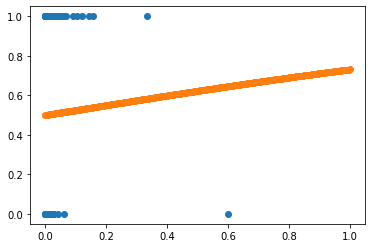

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      table.iloc[:, 15]   No. Observations:                 2685
Model:                            GLM   Df Residuals:                     2683
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -101.73
Date:                Thu, 06 Jan 2022   Deviance:                       16.349
Time:                        18:50:43   Pearson chi2:                     67.3
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -4.5896      0.581     -7.904      0.000      -5.728      -3.452
table.iloc[:, 16]    -0.3010      0.627     -0.480      0.631      -1.531       0.929
=====================================================================================
"""

In [ ]:
def model (x):
  return 1/(1+np.exp(-x))
x1 = np.linspace(0,1,num=400)
y1 = model(x1)

 
x = table.iloc[:,15]
y = table.iloc[:,16]
print(x)
model = LogisticRegression(solver='liblinear', random_state=0)
plt.scatter(x,y)
plt.scatter(x1,y1)
plt.show()

import statsmodels.api as sm

model = sm.GLM.from_formula("table.iloc[:,15] ~ table.iloc[:,16]", family = sm.families.Binomial(), data=table)
result = model.fit()
result.summary()


In [ ]:
import scipy.stats 
scipy.stats.norm.sf(abs(-0.480))



0.31561369651622256